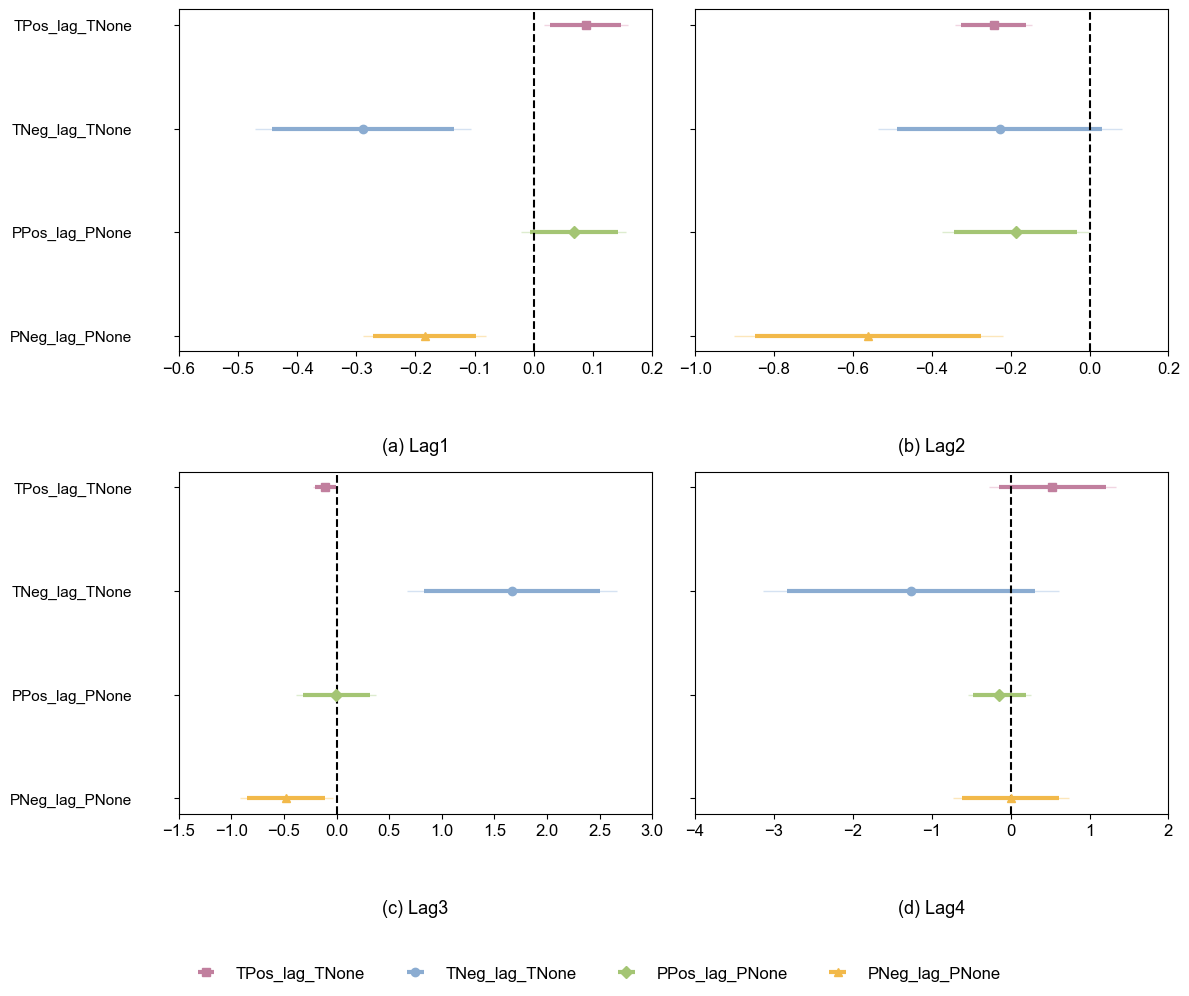

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置字体
plt.rcParams["font.family"] = "Arial"

# 读取数据
df = pd.read_excel("Table 3 figure.xlsx")

# 提取变量与组
groups = df["Group"].unique()
variables = df["variables"].unique()

# 颜色设置：95% 浅色，90% 深色
colors_95 = {
    "TPos_lag_TNone": "#F1D5E1",
    "TNeg_lag_TNone": "#D5E2F2",
    "PPos_lag_PNone": "#DDECCF",
    "PNeg_lag_PNone": "#FCE6BB"
}
colors_90 = {
    "TPos_lag_TNone": "#C17F9E",
    "TNeg_lag_TNone": "#8BACD1",
    "PPos_lag_PNone": "#A4C574",
    "PNeg_lag_PNone": "#F2B94A"
}
markers = {
    "TPos_lag_TNone": "s",
    "TNeg_lag_TNone": "o",
    "PPos_lag_PNone": "D",
    "PNeg_lag_PNone": "^"
}

# 创建2x2子图
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, group in enumerate(groups):
    ax = axs[i]
    subset = df[df["Group"] == group]

    y_labels = subset["variables"]
    y_pos = np.arange(len(y_labels))

    # 保证变量顺序一致
    subset = subset.set_index("variables").loc[variables].reset_index()

    for j, var in enumerate(variables):
        row = subset[subset["variables"] == var].iloc[0]
        est = row["Estimate"]

        # CI 误差
        err_90 = [[est - row["Lower_90_CI"]], [row["Upper_90_CI"] - est]]
        err_95 = [[est - row["Lower_95_CI"]], [row["Upper_95_CI"] - est]]

        y = j

        # ---- 95% CI：浅色，底层 ----
        ax.errorbar(
            est, y, xerr=np.abs(err_95),
            fmt='none',
            ecolor=colors_95[var],
            elinewidth=1,
            alpha=1.0,
            capsize=0,
            zorder=1
        )

        # ---- 90% CI：深色，有marker，顶层 ----
        ax.errorbar(
            est, y, xerr=np.abs(err_90),
            fmt=markers[var],
            color=colors_90[var],
            elinewidth=3,
            capsize=0,
            markersize=6,
            label=var if i == 0 else None,
            zorder=2
        )

    # 轴设置
    ax.set_yticks(y_pos)

    if i % 2 == 0:
        ax.set_yticklabels(variables, fontsize=11, ha='right')
        ax.tick_params(axis='y', pad=30)
    else:
        ax.set_yticklabels([])

    ax.set_xlabel("")
    ax.set_xticks(ax.get_xticks())
    ax.tick_params(axis='x', labelsize=12)

    ax.invert_yaxis()
    ax.axvline(0, color='black', linestyle='--', linewidth=1.5)

    # 子图标题
    ax.text(0.5, -0.25, f"({chr(97+i)}) {group}", transform=ax.transAxes,
            fontsize=13, ha='center', va='top')

# 图例只放一遍
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, frameon=False, fontsize=12)

# 布局调整
plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.savefig("figure_lag_group_grid.png", dpi=300, bbox_inches="tight")
plt.show()


C:\Users\yuzhi\AppData\Local\Temp\ipykernel_5784\3293457019.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


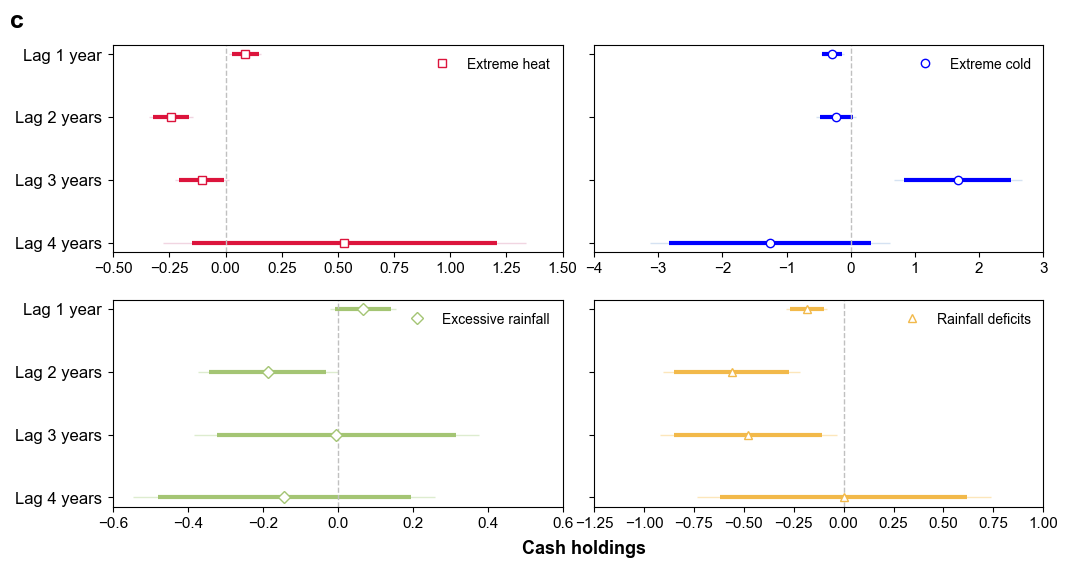

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置字体
plt.rcParams["font.family"] = "Arial"

# 读取数据
df = pd.read_excel("Table 3 figure.xlsx")

# 提取变量与组
groups = df["Group"].unique()
variables = df["variables"].unique()

# 自定义标签映射
LABEL_MAPPING = {
    "TPos_lag_TNone": "Extreme heat",
    "TNeg_lag_TNone": "Extreme cold",
    "PPos_lag_PNone": "Excessive rainfall",
    "PNeg_lag_PNone": "Rainfall deficits"
}

# 颜色设置：95% 浅色，90% 深色
colors_95 = {
    "TPos_lag_TNone": "#F1D5E1",
    "TNeg_lag_TNone": "#D5E2F2",
    "PPos_lag_PNone": "#DDECCF",
    "PNeg_lag_PNone": "#FCE6BB"
}
colors_90 = {
    "TPos_lag_TNone": "crimson",
    "TNeg_lag_TNone": "blue",
    "PPos_lag_PNone": "#A4C574",
    "PNeg_lag_PNone": "#F2B94A"
}
#C17F9E
#8BACD1
markers = {
    "TPos_lag_TNone": "s",
    "TNeg_lag_TNone": "o",
    "PPos_lag_PNone": "D",
    "PNeg_lag_PNone": "^"
}

# 创建子图布局
n_vars = len(variables)
n_cols = 2
n_rows = (n_vars + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 3*n_rows), 
                       gridspec_kw={'wspace': 0.07, 'hspace': 0.23})
if n_rows == 1:
    axs = np.array([axs])
axs = axs.flatten()

# 为每个variable创建子图
for i, var in enumerate(variables):
    ax = axs[i]
    subset = df[df["variables"] == var]
    
    y_pos = np.arange(len(groups))
    
    # 绘制数据点
    for j, group in enumerate(groups):
        row = subset[subset["Group"] == group].iloc[0]
        est = row["Estimate"]
        
        # CI 误差
        err_90 = [[est - row["Lower_90_CI"]], [row["Upper_90_CI"] - est]]
        err_95 = [[est - row["Lower_95_CI"]], [row["Upper_95_CI"] - est]]
        
        # ---- 95% CI ----
        ax.errorbar(
            est, j, xerr=np.abs(err_95),
            fmt='none',
            ecolor=colors_95[var],
            elinewidth=1,
            alpha=1.0,
            capsize=0,
            zorder=1
        )
        
        # ---- 90% CI ----
        ax.errorbar(
            est, j, xerr=np.abs(err_90),
            fmt=markers[var],
            color=colors_90[var],
            elinewidth=3,
            capsize=0,
            markersize=6,
            markerfacecolor='white',
            zorder=2
        )
    
    # 轴设置
    ax.set_yticks(y_pos)
    if i % n_cols == 0:  # 第一列显示Y轴标签
        ax.set_yticklabels(groups, fontsize=12, ha='right')
    else:  # 第二列隐藏标签
        ax.set_yticklabels([])
    ax.tick_params(axis='y', pad=5)
    
    ax.set_xlabel("")
    ax.set_xticks(ax.get_xticks())
    ax.tick_params(axis='x', labelsize=11)
    ax.invert_yaxis()
    ax.axvline(0, color='silver', linestyle='--', linewidth=1)
    
    
    # 添加独立图例
    legend_elements = [plt.Line2D([0], [0],
                      marker=markers[var],
                      color=colors_90[var],
                      label=LABEL_MAPPING[var],
                      markersize=6,
                      markerfacecolor='none',
                      linestyle='None')]
    ax.legend(handles=legend_elements,
              loc='upper right',
              frameon=False,
              fontsize=10)

# 添加文字（新增部分）
ax.text(
    x=-1.3, y=2.4,  # 更靠近顶部
    s="c",  # 替换为你的文字
    transform=ax.transAxes,
    fontsize=18,  # 建议10-12
    fontweight='bold',  # 关键加粗参数
    color='black',  # 确保黑色文字
    verticalalignment='top',
    linespacing=1.5  # 行间距（多行文字时）
)

# 添加文字（新增部分）
ax.text(
    x=-0.16, y=-0.16,  # 更靠近顶部
    s="Cash holdings",  # 替换为你的文字
    transform=ax.transAxes,
    fontsize=13,  # 建议10-12
    fontweight='bold',  # 关键加粗参数
    color='black',  # 确保黑色文字
    verticalalignment='top',
    linespacing=1.5  # 行间距（多行文字时）
)

# 隐藏多余子图
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# 调整布局并保存
plt.tight_layout()
plt.savefig("figure_variable_group_grid_final.png", dpi=500, bbox_inches="tight")
plt.show()

In [18]:
from PIL import Image

# 两张图片路径
top_image_path = "merged_figures_horizontal.png"
bottom_image_path = "figure_variable_group_grid_final.png"

# 打开两张图片
top_img = Image.open(top_image_path)
bottom_img = Image.open(bottom_image_path)

# 计算目标宽度（取最大宽度）
target_width = max(top_img.width, bottom_img.width)

# 调整图片宽度（保持宽高比）
def resize_to_width(img, target_width):
    width_percent = target_width / float(img.width)
    target_height = int(float(img.height) * float(width_percent))
    return img.resize((target_width, target_height), Image.Resampling.LANCZOS)

# 调整两张图片宽度
top_img_resized = resize_to_width(top_img, target_width)
bottom_img_resized = resize_to_width(bottom_img, target_width)

# 计算合并后的尺寸
total_height = top_img_resized.height + bottom_img_resized.height

# 创建新画布（白色背景）
merged_img = Image.new('RGB', (target_width, total_height), (255, 255, 255))

# 将图片粘贴到新画布上（现在宽度相同，直接左对齐即可）
merged_img.paste(top_img_resized, (0, 0))
merged_img.paste(bottom_img_resized, (0, top_img_resized.height))

# 保存合并后的图片
merged_img.save("merged_vertical_resized.png", dpi=(500, 500), quality=100)
print("图片已等宽上下合并保存为 merged_vertical_resized.png")

图片已等宽上下合并保存为 merged_vertical_resized.png
